### Importar librerias para abrir imagfenes .FITS y para plotear imagenes

In [6]:
import matplotlib.pyplot as plt
from astropy.io import fits

In [7]:
path='/home/oem/datosFits/spuriousCharge/Microchip/14AUG23/proc_skp_module24_MITLL01_externalVr-4_Vv2_T140__NSAMP225_NROW650_NCOL700_EXPOSURE0_NBINROW1_NBINCOL1_img109.fits'

### Crear una lista con los datos por cada extension

In [8]:
imagen=fits.open(path)
data_Ext=[]
for i in range(0,4):
    data_Ext.append(imagen[i].data)

Min=data_Ext[0].min()
Max=data_Ext[0].max()

### Podemos hacer plot de cada extension

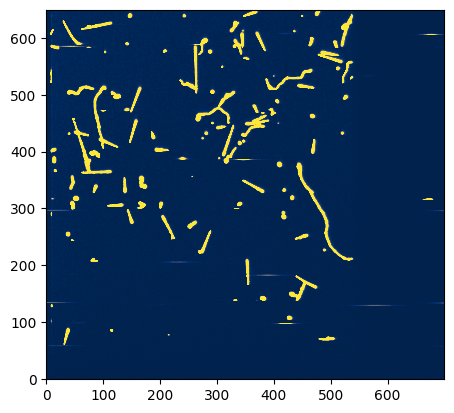

In [9]:
plt.imshow(data_Ext[0], vmin=0, vmax=Max*.005, cmap='cividis', origin='lower')

### Hacer plot de una region en particular, sobre la que queramos conocer su distribucion de pixeles

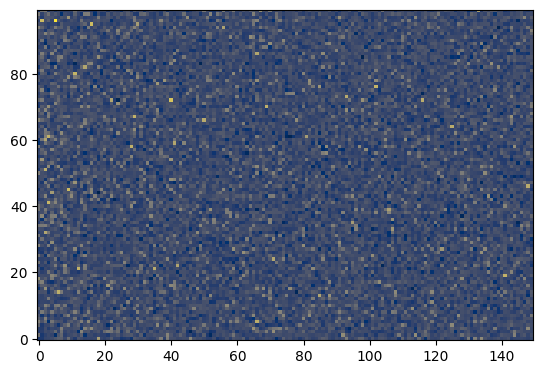

In [10]:
plt.imshow(data_Ext[0][400:500,550:], cmap='cividis', origin='lower')

### histogram devuelve las componentes X (bines) y Y (cuentas de cada bin) de un histograma

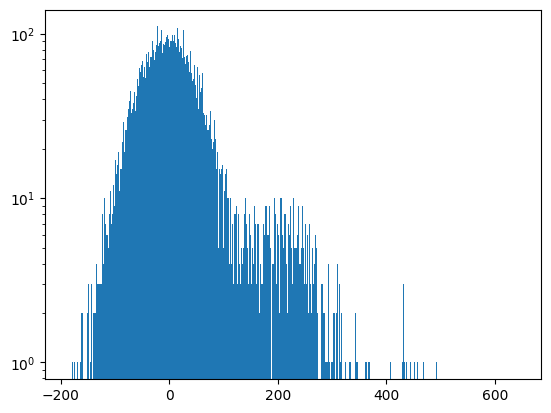

In [11]:
counts_Y, bins_X, _ = plt.hist(data_Ext[0][400:500,550:].flatten(),1000)
plt.yscale('log')

## maneras diferentes de hacer un plot de las 4 extensiones

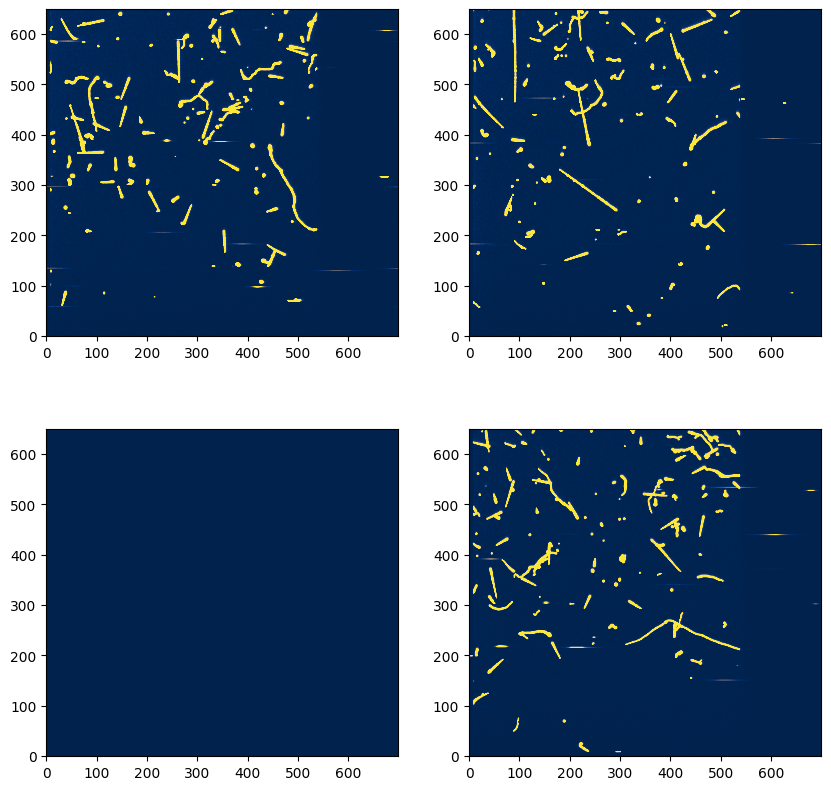

In [12]:
fig=plt.figure(figsize=(10,10))  #definimos Tamaño de la Figura

#Colocar en el canvas las 4 extensiones
plt.subplot(2,2,1)
plt.imshow(data_Ext[0], vmin=0, vmax=Max*.005, cmap='cividis', origin='lower')

plt.subplot(2,2,2)
plt.imshow(data_Ext[1], vmin=0, vmax=Max*.005, cmap='cividis', origin='lower')

plt.subplot(2,2,3)
plt.imshow(data_Ext[2], vmin=0, vmax=Max*.005, cmap='cividis', origin='lower')

plt.subplot(2,2,4)
plt.imshow(data_Ext[3], vmin=0, vmax=Max*.005, cmap='cividis', origin='lower')

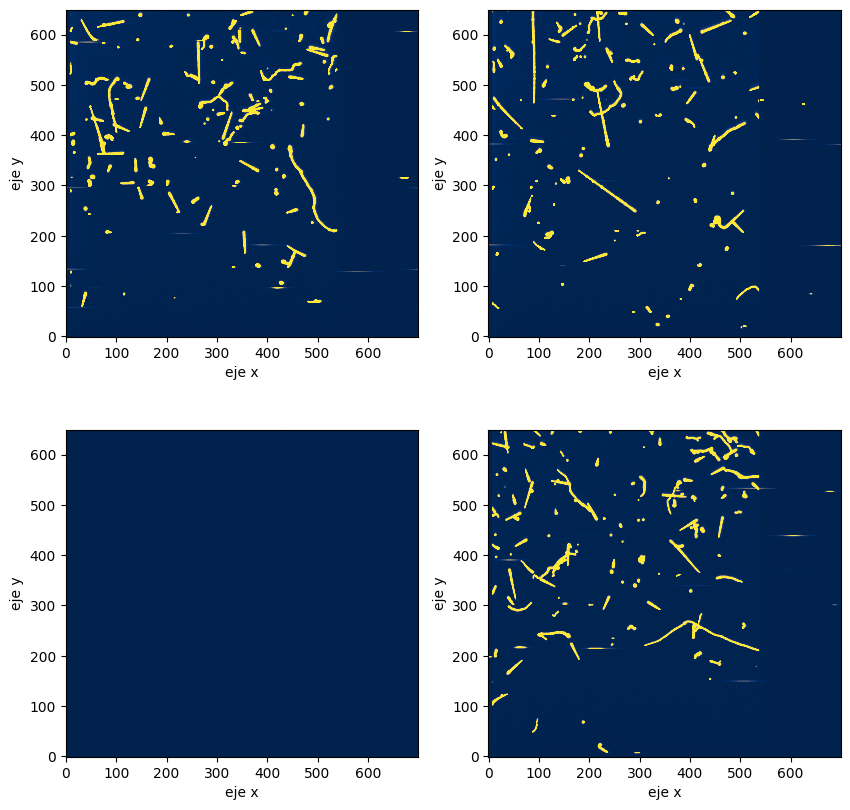

In [13]:
fig=plt.figure(figsize=(10,10))  #definimos Tamaño de la Figura
for i in range(0,4):
    #Colocar en el canvas las 4 extensiones
    plt.subplot(2,2,i+1)
    plt.imshow(data_Ext[i], vmin=0, vmax=Max*.005, cmap='cividis', origin='lower')
    plt.xlabel('eje x')
    plt.ylabel('eje y')
    

### Tarea Hacer el plot manejando las variables como objetos


In [15]:
# from numpy import linspace as linspace
# x = linspace(0, 2, 100)  # Sample data.

# # Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
# fig, ax = plt.subplots(2,2)  # Create a figure and an axes.
# ax[0].plot(x, x, label='linear')  # Plot some data on the axes.
# ax[0].plot(x, x**2, label='quadratic')  # Plot more data on the axes...
# ax[0].plot(x, x**3, label='cubic')  # ... and some more.
# ax[0].set_xlabel('x label')  # Add an x-label to the axes.
# ax[0].set_ylabel('y label')  # Add a y-label to the axes.
# ax[0].set_title("Simple Plot")  # Add a title to the axes.
# ax[0].legend()  # Add a legend.

# Ajuste de una curva en nuestro histograma
El proposito es conocer los parametros de la curva a partir de los datos experimentales. Para ello nos apollaremos en la funcion curve_fit

In [16]:
from scipy.optimize import curve_fit
import numpy as np

## Definir la curva a ajustar

In [17]:

def gauss(x,x0,s,A): # x=data, x0=mean, s=StdDev, A=amplitud
    return A*np.exp(-(x-x0)**2/(2*s**2))/np.sqrt(np.pi*2*s**2)

### Es necesario ajustar la cantidad de bins
### popt contiene los valores optimos para el ajuste de la curva
### popt contiene x0=mean, s=StdDev, A=amplitud

In [18]:
bins= (bins_X[1:]+bins_X[:-1])/2
popt,_=curve_fit(gauss, bins,counts_Y)

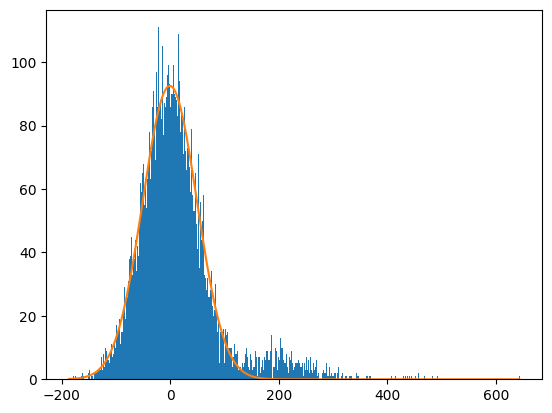

In [23]:
y,x,_=plt.hist(data_Ext[0][400:500,550:].flatten(),1000)
plt.plot(bins, gauss(bins, *popt))


In [26]:
x.max()

643.5552

In [28]:
y,x=np.histogram(data_Ext[0][400:500,550:].flatten(),1000)

In [37]:
y.max()

111

In [38]:
np.argmax(y)

199

In [34]:
x[np.argmax(y)]

-22.14554

In [40]:
print(y[199])

111
